In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the dataset from Google Drive (replace with your file path)
file_path = 'Restaurant_Reviews.tsv'
data = pd.read_csv(file_path, delimiter='\t', quoting=3)


In [3]:
# Initialize the Porter Stemmer and stopwords
ps = PorterStemmer()
corpus = []

# Preprocess each review
for i in range(len(data)):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [ps.stem(word) for word in review_words if word not in set(stopwords.words('english'))]
    review = ' '.join(review_words)
    corpus.append(review)


In [4]:
# Convert text data into numerical feature vectors
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values


In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [6]:
# Training the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

--------- Model Evaluation ---------
Accuracy: 76.50%
Precision: 76.42%
Recall: 78.64%


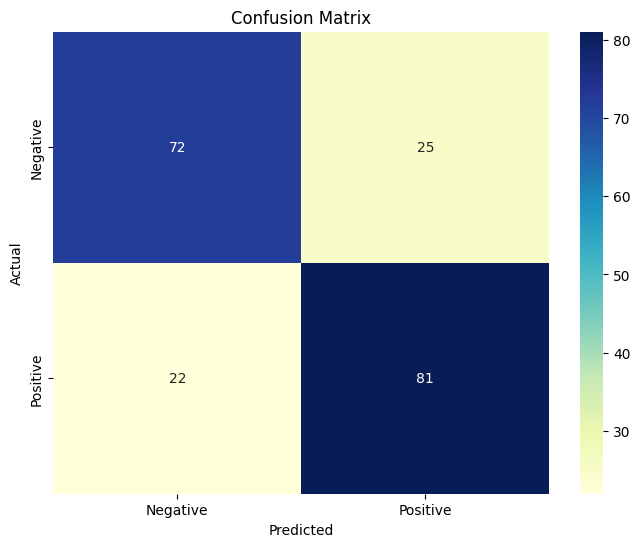

In [7]:
# Predicting sentiment for test data
y_pred = classifier.predict(X_test)

# Calculating accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print("--------- Model Evaluation ---------")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Function to predict sentiment of a given review
def predict_sentiment(review):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [ps.stem(word) for word in review_words if word not in set(stopwords.words('english'))]
    review = ' '.join(review_words)

    # Vectorize the processed review and make prediction
    temp = cv.transform([review]).toarray()
    prediction = classifier.predict(temp)

    return "Positive" if prediction[0] == 1 else "Negative"


In [9]:
# Test the sentiment prediction function with example reviews
sample_reviews = [
    'The food is really bad.',
    'Food was pretty bad and the service was very slow',
    'The food was absolutely wonderful, from preparation to presentation, very pleasing.',
    'Food was average'
]

for review in sample_reviews:
    sentiment = predict_sentiment(review)
    print(f'Review: "{review}" --> Sentiment: {sentiment}')


Review: "The food is really bad." --> Sentiment: Negative
Review: "Food was pretty bad and the service was very slow" --> Sentiment: Negative
Review: "The food was absolutely wonderful, from preparation to presentation, very pleasing." --> Sentiment: Positive
Review: "Food was average" --> Sentiment: Negative
